In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

In [20]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    A1= 0.001
    g1= 1.0909941519519688
    A2= 0.001
    g2= 1.1265983183138195
    kb= 1.7653536866624178
    b= 0.0936943466192764
    
    
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,800)
num_points_0=600
initialConditions = [0, 0, 0, 0,0.6213]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration (gm / 100gm of mixed solvent)')

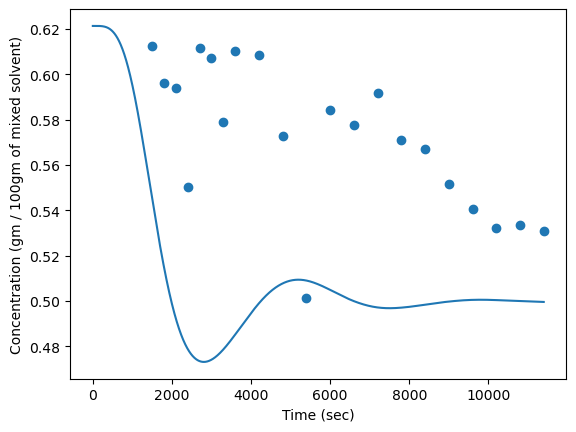

In [16]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    #A1= 0.001
    #g1= 1.3674422335246772
    #A2= 0.001
    #g2= 0.8806401407716695
    #kb= 1.9159735437909502
    #b= 0.11727791909470649
    A1= 0.001
    g1= 2.46744
    A2= 0.001
    g2= 1.98064
    kb= 0.3159
    b= 0.1172
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
Time1 = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration1 = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])
plt.scatter(Time1, Concentration1)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (gm / 100gm of mixed solvent)")

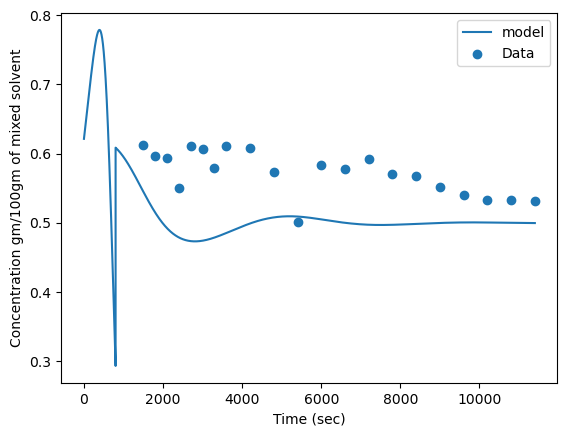

In [21]:
plt.plot(np.append(sol.t,sol1.t[800:]),np.append(sol.y[4], sol1.y[4,800:]), label ="model")
plt.scatter(Time1, Concentration1, label='Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.legend()
plt.show()